# **Modul 3 Machine Learning**

Mochamad Rahina Bintang Pambayun (202010370311402)

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import random
from tensorflow.keras.regularizers import l2

## **Tugas 1 - Data Citra**

### **Load Data & Preprocessing**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
folder_path = '/content/drive/MyDrive/Praktikum Machine Learning/Modul 3/'

import os
os.chdir(folder_path)

!pwd

/content/drive/MyDrive/Praktikum Machine Learning/Modul 3


**Preprocessing**

In [4]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.30
)

train_generator = datagen.flow_from_directory(
    'Dataset/rps',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    'Dataset/rps',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Mengambil batch dari validation_generator untuk Testing Set
X_test1, y_test1 = val_generator[0]
X_test2, y_test2 = val_generator[1]
X_test3, y_test3 = val_generator[2]
X_test4, y_test4 = val_generator[3]

# Menggabungkan batch-batch tersebut
X_test = np.concatenate([X_test1, X_test2, X_test3, X_test4], axis=0)
y_test = np.concatenate([y_test1, y_test2, y_test3, y_test4], axis=0)

# Hapus data test dari val_generator
val_generator.samples -= len(X_test)

Found 1764 images belonging to 3 classes.
Found 756 images belonging to 3 classes.


In [5]:
# Jumlah Data Test
print(len(X_test))

128


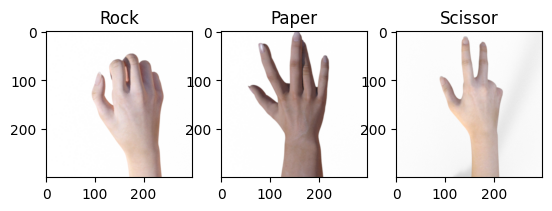

In [6]:
rock_img = plt.imread("Dataset/rps/rock/rock01-000.png")
paper_img = plt.imread("Dataset/rps/paper/paper01-000.png")
scissor_img = plt.imread("Dataset/rps/scissors/scissors01-000.png")

plt.subplot(131)
plt.imshow(rock_img)
plt.title("Rock")
plt.subplot(132)
plt.imshow(paper_img)
plt.title("Paper")
plt.subplot(133)
plt.imshow(scissor_img)
plt.title("Scissor")
plt.show()

### **Modelling**

In [7]:
# Pembuatan Model CNN
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [9]:
# Setting Hyper Parameter
lr = 0.001
max_epoch = 20
opt_func = Adam(learning_rate=lr)

model.compile(optimizer=opt_func,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Tempat menyimpan model terbaik
model_checkpoint = ModelCheckpoint(
    filepath='/content/drive/MyDrive/Praktikum Machine Learning/Modul 3/best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    verbose=1
)

In [ ]:
history = model.fit(train_generator, validation_data=val_generator, epochs=max_epoch, callbacks=[model_checkpoint])

Epoch 1/20
56/56 [==============================] - ETA: 0s - loss: 1.7605 - accuracy: 0.7200
Epoch 1: val_accuracy improved from -inf to 0.71561, saving model to /content/drive/MyDrive/Praktikum Machine Learning/Modul 3/best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


56/56 [==============================] - 486s 9s/step - loss: 1.7605 - accuracy: 0.7200 - val_loss: 1.2057 - val_accuracy: 0.7156
Epoch 2/20
56/56 [==============================] - ETA: 0s - loss: 0.3225 - accuracy: 0.9785
Epoch 2: val_accuracy did not improve from 0.71561
56/56 [==============================] - 46s 824ms/step - loss: 0.3225 - accuracy: 0.9785 - val_loss: 1.0113 - val_accuracy: 0.7037
Epoch 3/20
56/56 [==============================] - ETA: 0s - loss: 0.1641 - accuracy: 0.9932
Epoch 3: val_accuracy improved from 0.71561 to 0.75000, saving model to /content/drive/MyDrive/Praktikum Machine Learning/Modul 3/best_model.h5
56/56 [==============================] - 47s 823ms/step - loss: 0.1641 - accuracy: 0.9932 - val_loss: 0.8313 - val_accuracy: 0.7500
Epoch 4/20
56/56 [==============================] - ETA: 0s - loss: 0.1630 - accuracy: 0.9881
Epoch 4: val_accuracy did not improve from 0.75000
56/56 [==============================] - 46s 818ms/step - loss: 0.1630 - accur

### **Evaluation**

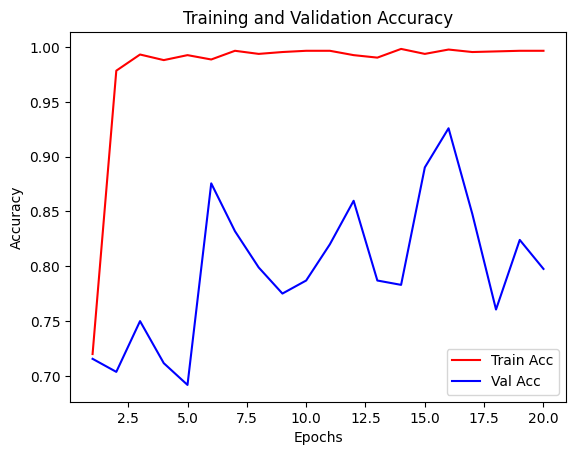

In [ ]:
# Dapatkan riwayat akurasi pelatihan dan validasi
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot akurasi pelatihan dan validasi
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'r', label='Train Acc')
plt.plot(epochs, val_accuracy, 'b', label='Val Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Memuat model terbaik
best_model = keras.models.load_model('best_model.h5')

In [ ]:
y_pred = best_model.predict(X_test)
y_true = np.argmax(y_test, axis=1)

class_names = sorted(train_generator.class_indices.keys())

print(classification_report(y_true, np.argmax(y_pred, axis=1), target_names=class_names))

4/4 [==============================] - 1s 217ms/step
              precision    recall  f1-score   support

       paper       0.88      0.95      0.91        39
        rock       1.00      1.00      1.00        47
    scissors       0.95      0.88      0.91        42

    accuracy                           0.95       128
   macro avg       0.94      0.94      0.94       128
weighted avg       0.95      0.95      0.95       128



1/1 [==============================] - 0s 112ms/step


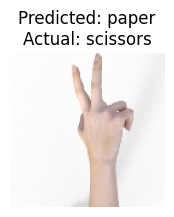

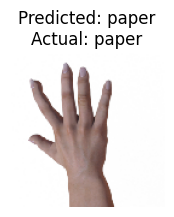

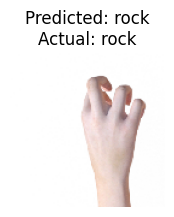

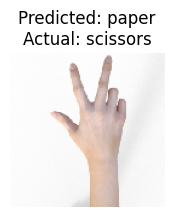

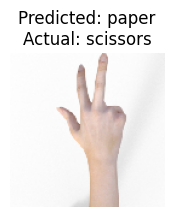

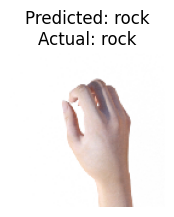

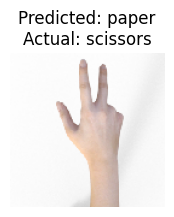

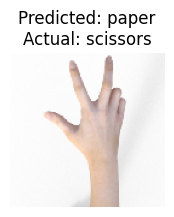

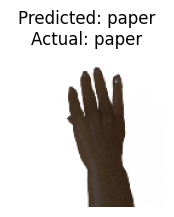

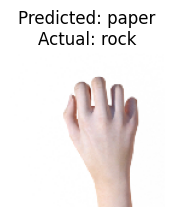

In [ ]:
# Ambil 10 indeks gambar secara acak
random_indices = random.sample(range(len(X_test)), 10)
X_sample = X_test[random_indices]
y_sample = y_true[random_indices]

# Prediksi 10 gambar
y_pred_sample = model.predict(X_sample)

# Hasil Prediksi
for i in range(10):
    true_class = class_names[y_sample[i]]
    predicted_class = class_names[np.argmax(y_pred_sample[i])]
    print(f"Gambar {i + 1}: Predict: {predicted_class}, Actual: {true_class}")